In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
x_data=torch.FloatTensor([[1],[2],[3],[4],[5]])
t_data=torch.FloatTensor([[3],[5],[7],[9],[11]])

In [4]:
w=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [5]:
y=x_data*w+b
y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

In [6]:
cost=torch.mean((t_data-y)**2)
cost

tensor(57., grad_fn=<MeanBackward0>)

In [7]:
optimizer=optim.SGD([w,b],lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [8]:
epochs=2001
for epoch in range(epochs):
    y=x_data*w+b  #가설
    cost=torch.mean((t_data-y)**2)  #  비용함수 구하기
    optimizer.zero_grad()  # 최적화 값 초기화
    cost.backward()  # 
    optimizer.step()

    if epoch % 100==0:
        print('epoch:', epoch, 'w:',w, 'b:',b, 'cost:',cost)

epoch: 0 w: tensor([0.5000], requires_grad=True) b: tensor([0.1400], requires_grad=True) cost: tensor(57., grad_fn=<MeanBackward0>)
epoch: 100 w: tensor([2.0815], requires_grad=True) b: tensor([0.7058], requires_grad=True) cost: tensor(0.0159, grad_fn=<MeanBackward0>)
epoch: 200 w: tensor([2.0581], requires_grad=True) b: tensor([0.7903], requires_grad=True) cost: tensor(0.0081, grad_fn=<MeanBackward0>)
epoch: 300 w: tensor([2.0414], requires_grad=True) b: tensor([0.8505], requires_grad=True) cost: tensor(0.0041, grad_fn=<MeanBackward0>)
epoch: 400 w: tensor([2.0295], requires_grad=True) b: tensor([0.8935], requires_grad=True) cost: tensor(0.0021, grad_fn=<MeanBackward0>)
epoch: 500 w: tensor([2.0210], requires_grad=True) b: tensor([0.9241], requires_grad=True) cost: tensor(0.0011, grad_fn=<MeanBackward0>)
epoch: 600 w: tensor([2.0150], requires_grad=True) b: tensor([0.9459], requires_grad=True) cost: tensor(0.0005, grad_fn=<MeanBackward0>)
epoch: 700 w: tensor([2.0107], requires_grad=T

In [9]:
import numpy as np
x_data1=np.array([[1,2],[2,3],[3,4],[4,5],[5,6]]).reshape(5,2)
t_data1=np.array([3,5,7,9,11]).reshape(5,1)
print(x_data1)
print(t_data1)

[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
[[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]


In [10]:
x_data2=torch.from_numpy(x_data1).float()
t_data2=torch.from_numpy(t_data1).float()
print(x_data2)
print(t_data2)

tensor([[1., 2.],
        [2., 3.],
        [3., 4.],
        [4., 5.],
        [5., 6.]])
tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])


In [11]:
w=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([[0.],
        [0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [12]:
optimizer=optim.SGD([w,b], lr=1e-6)
epochs=200001
for epoch in range(epochs):
    y=x_data2.matmul(w)+b
    cost=torch.mean((t_data2-y)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%400==0:
        print('Epoch:',epoch, 'y:',y, 'cost:',cost.item(),'w:',w, 'b:',b)

Epoch: 0 y: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>) cost: 57.0 w: tensor([[5.0000e-05],
        [6.4000e-05]], requires_grad=True) b: tensor([1.4000e-05], requires_grad=True)
Epoch: 400 y: tensor([[0.0759],
        [0.1210],
        [0.1660],
        [0.2111],
        [0.2561]], grad_fn=<AddBackward0>) cost: 54.34687423706055 w: tensor([[0.0198],
        [0.0254]], requires_grad=True) b: tensor([0.0055], requires_grad=True)
Epoch: 800 y: tensor([[0.1500],
        [0.2391],
        [0.3281],
        [0.4172],
        [0.5063]], grad_fn=<AddBackward0>) cost: 51.8172721862793 w: tensor([[0.0391],
        [0.0501]], requires_grad=True) b: tensor([0.0109], requires_grad=True)
Epoch: 1200 y: tensor([[0.2224],
        [0.3544],
        [0.4864],
        [0.6184],
        [0.7505]], grad_fn=<AddBackward0>) cost: 49.405452728271484 w: tensor([[0.0580],
        [0.0742]], requires_grad=True) b: tensor([0.0162], requires_grad=True)
Epoch: 160

In [14]:
import pandas as pd
df=pd.read_csv('data/data-01-test-score.csv')
data=np.array(df.values)
x_data=data[:,:3].reshape(-1, 3)
t_data=data[:,-1].reshape(-1, 1)
print(x_data)
print(t_data)

[[ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
[[185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]


In [15]:
x_data3=torch.from_numpy(x_data).float()
t_data3=torch.from_numpy(t_data).float()
print(x_data3)
print(t_data3)


tensor([[ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]])
tensor([[185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183.],
        [177.],
        [159.],
        [177.],
       

In [16]:
w=torch.zeros((3,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([[0.],
        [0.],
        [0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [17]:
cost_list=[]
optimizer=optim.SGD([w,b], lr=1e-6)
epochs=20001
for epoch in range(epochs):
    y=x_data3.matmul(w)+b

    cost=torch.mean((y-t_data3)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch%1000==0:
        cost_list.append([epoch, cost.item()])
        print('epoch:',epoch, 'cost:', cost.item(), 'w:',w, 'b:',b.item())


epoch: 0 cost: 26966.458984375 w: tensor([[0.0263],
        [0.0264],
        [0.0271]], requires_grad=True) b: 0.0003249166766181588
epoch: 1000 cost: 11.63180160522461 w: tensor([[0.6597],
        [0.6613],
        [0.7047]], requires_grad=True) b: 0.0082217026501894
epoch: 2000 cost: 11.230006217956543 w: tensor([[0.6512],
        [0.6531],
        [0.7209]], requires_grad=True) b: 0.00818737130612135
epoch: 3000 cost: 10.859905242919922 w: tensor([[0.6430],
        [0.6453],
        [0.7365]], requires_grad=True) b: 0.008147812448441982
epoch: 4000 cost: 10.518826484680176 w: tensor([[0.6350],
        [0.6380],
        [0.7514]], requires_grad=True) b: 0.008103235624730587
epoch: 5000 cost: 10.20454216003418 w: tensor([[0.6273],
        [0.6310],
        [0.7658]], requires_grad=True) b: 0.008053780533373356
epoch: 6000 cost: 9.915019989013672 w: tensor([[0.6197],
        [0.6244],
        [0.7795]], requires_grad=True) b: 0.007999715395271778
epoch: 7000 cost: 9.647990226745605 w:

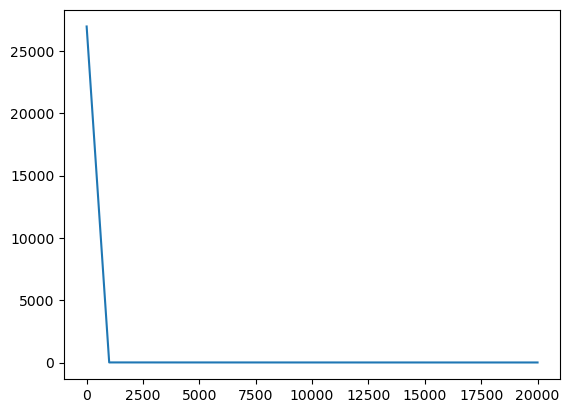

In [18]:
costs=np.array(cost_list).T
plt.plot(costs[0],costs[1])